## Ecommerce Customer Data
Try and Predict the yearly amount spent. 

In [1]:
# import important packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read csv
data = pd.read_csv('data.csv')

This dataset contains data of customer from a ecommerce platform. (2022-01-19)
Can use this data to predict the Yearly Amount Spent based on customer features

## EDA

In [3]:
data.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
data.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [5]:
data.info

<bound method DataFrame.info of                            \tEmail  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ... 

## plot time on app vs amount spend 

In [6]:
data = data.drop(['\tEmail', 'Address', 'Avatar'], axis= 1)

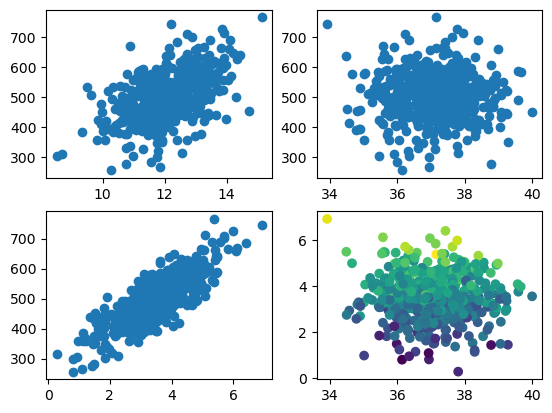

In [7]:
# make the plots
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows= 2,
                                           ncols=2)
ax0.scatter(x = data['Time on App'], y = data['Yearly Amount Spent'])
ax1.scatter(x = data['Time on Website'], y = data['Yearly Amount Spent'])
ax2.scatter(x = data['Length of Membership'], y = data['Yearly Amount Spent'])
ax3.scatter(x = data['Time on Website'], y = data['Length of Membership'], c= data['Yearly Amount Spent']);




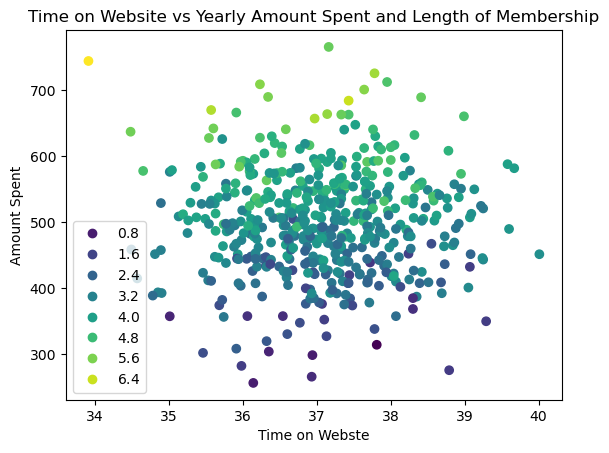

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(x = data['Time on Website'], 
                     y = data['Yearly Amount Spent'], 
                     c= data['Length of Membership']);
# Customize the plot 
ax.set(title = 'Time on Website vs Yearly Amount Spent and Length of Membership',
      xlabel = 'Time on Webste',
      ylabel = 'Amount Spent')
ax.legend(*scatter.legend_elements(),);

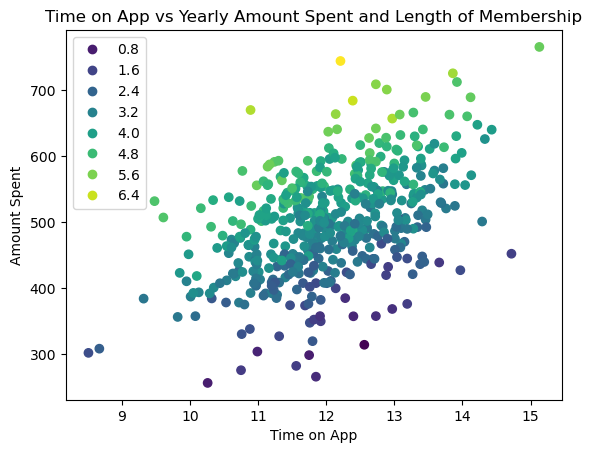

In [9]:
fig, ax = plt.subplots()
scatter = ax.scatter(x = data['Time on App'], 
                     y = data['Yearly Amount Spent'], 
                     c= data['Length of Membership']);
# Customize the plot 
ax.set(title = 'Time on App vs Yearly Amount Spent and Length of Membership',
      xlabel = 'Time on App',
      ylabel = 'Amount Spent')
ax.legend(*scatter.legend_elements(),);

## length of membership seems to have the strongest correlation with spend

## Create a model

In [10]:
# break into test split 
from sklearn.model_selection import train_test_split
x = data.drop(['Yearly Amount Spent'], axis = 1)
y = data['Yearly Amount Spent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
# ridge method 
from sklearn import linear_model
model = linear_model.RidgeCV()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.878377552580985

In [12]:
model.score(x_test,y_test)

0.8891151214420865

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model_forest = RandomForestRegressor()
model_forest.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
model_forest.score(x_train,y_train)

0.9767564585578614

In [16]:
model_forest.score(x_test,y_test)

0.8741657380732574

Random Forest model is overfitting the test set. The ridge linear model is better at predicting yearly spend. 